In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
bitcoin_search_data = pd.read_csv("Bitcoin Search Trend.csv")
daily_bitcoin_price = pd.read_csv("Daily Bitcoin Price.csv")
tesla_data = pd.read_csv("TESLA Search Trend vs Price.csv")
unemployment_data_19 = pd.read_csv("UE Benefits Search vs UE Rate 2004-19.csv")
unemployment_data_20 = pd.read_csv("UE Benefits Search vs UE Rate 2004-20.csv")

### Data Visualization of the dataframes

In [3]:
print("-----Bitcoin Search Data-----")
print(bitcoin_search_data.shape)
print(bitcoin_search_data.head())
print("\n\n")

print("-----Bitcoin Price Data-----")
print(daily_bitcoin_price.shape)
print(daily_bitcoin_price.head())
print("\n\n")

print("-----Tesla Data-----")
print(tesla_data.shape)
print(tesla_data.head())
print("\n\n")

print("-----Unemployment 19 Data-----")
print(unemployment_data_19.shape)
print(unemployment_data_19.head())
print("\n\n")

print("-----Unemployment 20 Data-----")
print(unemployment_data_20.shape)
print(unemployment_data_20.head())
print("\n\n")

-----Bitcoin Search Data-----
(73, 2)
     MONTH  BTC_NEWS_SEARCH
0  2014-09                5
1  2014-10                4
2  2014-11                4
3  2014-12                4
4  2015-01                5



-----Bitcoin Price Data-----
(2204, 3)
         DATE       CLOSE      VOLUME
0  2014-09-17  457.334015  21056800.0
1  2014-09-18  424.440002  34483200.0
2  2014-09-19  394.795990  37919700.0
3  2014-09-20  408.903992  36863600.0
4  2014-09-21  398.821014  26580100.0



-----Tesla Data-----
(124, 3)
        MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0  2010-06-01                3           4.766
1  2010-07-01                3           3.988
2  2010-08-01                2           3.896
3  2010-09-01                2           4.082
4  2010-10-01                2           4.368



-----Unemployment 19 Data-----
(181, 3)
     MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0  2004-01                      34     5.7
1  2004-02                      33     5.6
2  2004-03                      25   

### Describe the Data

In [4]:
print(bitcoin_search_data.describe())
print("\n\n")
print(daily_bitcoin_price.describe())
print("\n\n")
print(tesla_data.describe())
print("\n\n")
print(unemployment_data_19.describe())
print("\n\n")
print(unemployment_data_20.describe())

       BTC_NEWS_SEARCH
count        73.000000
mean         15.013699
std          15.146959
min           3.000000
25%           5.000000
50%          14.000000
75%          18.000000
max         100.000000



              CLOSE        VOLUME
count   2203.000000  2.203000e+03
mean    4429.421245  8.043622e+09
std     4148.150071  1.176529e+10
min      178.102997  5.914570e+06
25%      433.629502  6.029915e+07
50%     3637.520020  2.018890e+09
75%     7997.372803  1.322478e+10
max    19497.400391  7.415677e+10



       TSLA_WEB_SEARCH  TSLA_USD_CLOSE
count       124.000000      124.000000
mean          8.725806       50.962145
std           5.870332       65.908389
min           2.000000        3.896000
25%           3.750000        7.352500
50%           8.000000       44.653000
75%          12.000000       58.991999
max          31.000000      498.320007



       UE_BENEFITS_WEB_SEARCH      UNRATE
count              181.000000  181.000000
mean                35.110497    6.217680
s

### See if there's any Null value

In [5]:
print("Bitcoin Search Null?")
print(bitcoin_search_data.isna().sum())
print("\n\n")

print("Bitcoin Price Null?")
print(daily_bitcoin_price.isna().sum())
print("\n\n")

print("Tesla Data Null?")
print(tesla_data.isna().sum())
print("\n\n")

print("Unemployment Data 19 Null?")
print(unemployment_data_19.isna().sum())
print("\n\n")

print("Unemployment Data 20 Null?")
print(unemployment_data_20.isna().sum())
print("\n\n")

Bitcoin Search Null?
MONTH              0
BTC_NEWS_SEARCH    0
dtype: int64



Bitcoin Price Null?
DATE      0
CLOSE     1
VOLUME    1
dtype: int64



Tesla Data Null?
MONTH              0
TSLA_WEB_SEARCH    0
TSLA_USD_CLOSE     0
dtype: int64



Unemployment Data 19 Null?
MONTH                     0
UE_BENEFITS_WEB_SEARCH    0
UNRATE                    0
dtype: int64



Unemployment Data 20 Null?
MONTH                     0
UE_BENEFITS_WEB_SEARCH    0
UNRATE                    0
dtype: int64





In [6]:
daily_bitcoin_price = daily_bitcoin_price.dropna()
print(daily_bitcoin_price.isna().sum())

DATE      0
CLOSE     0
VOLUME    0
dtype: int64


### Convert Date String into Date Time from all 4 data

In [7]:
bitcoin_search_data["MONTH"] = bitcoin_search_data["MONTH"].astype("datetime64")
daily_bitcoin_price["DATE"] = daily_bitcoin_price["DATE"].astype("datetime64")
tesla_data["MONTH"] = tesla_data["MONTH"].astype("datetime64")
unemployment_data_19["MONTH"] = unemployment_data_19["MONTH"].astype("datetime64")
unemployment_data_20["MONTH"] = pd.to_datetime(unemployment_data_20["MONTH"])

In [8]:
print(bitcoin_search_data["MONTH"].head(0))
print(daily_bitcoin_price["DATE"].head(0))
print(tesla_data["MONTH"].head(0))
print(unemployment_data_19["MONTH"].head(0))
print(unemployment_data_20["MONTH"].head(0))

Series([], Name: MONTH, dtype: datetime64[ns])
Series([], Name: DATE, dtype: datetime64[ns])
Series([], Name: MONTH, dtype: datetime64[ns])
Series([], Name: MONTH, dtype: datetime64[ns])
Series([], Name: MONTH, dtype: datetime64[ns])


### Converting Daily Data to Monthly Data using Resample Methpd

In [9]:
bitcoin_price_data = daily_bitcoin_price.resample('M', on='DATE').last()

In [10]:
bitcoin_price_data.head()

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


### Tesla Stock Price and Tesla Search Volume Visualization using Matplotlib

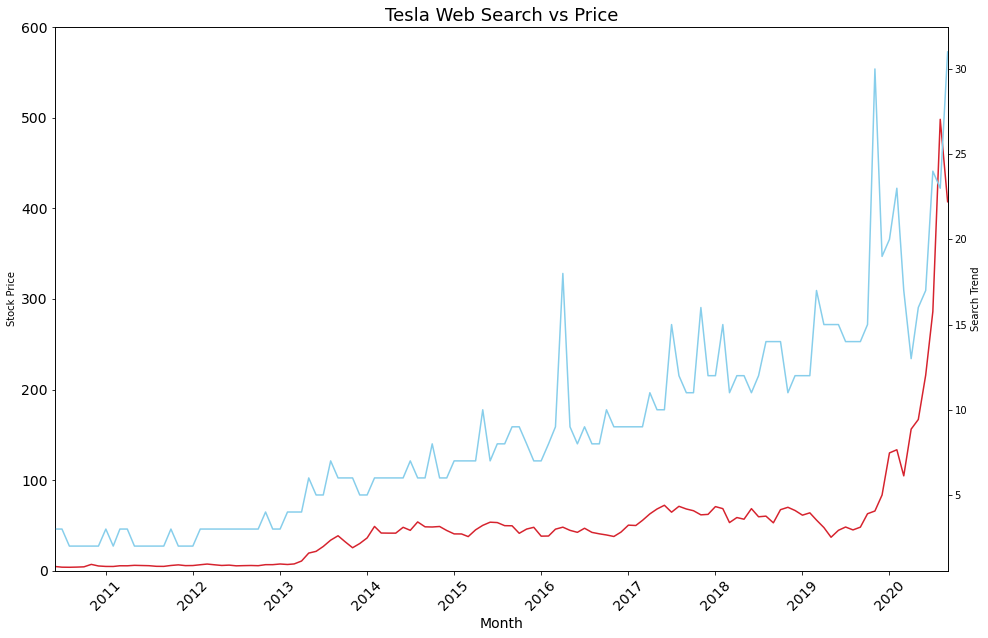

In [11]:
plt.figure(figsize=(16,10))

plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14, rotation = 45)

plt.xlabel("Month", fontsize = 14)
plt.title("Tesla Web Search vs Price", fontsize = 18)

stock_price = plt.gca()
search_trend = stock_price.twinx()

stock_price.set_ylabel("Stock Price")
search_trend.set_ylabel("Search Trend")

stock_price.set_ylim([0, 600])
stock_price.set_xlim([tesla_data["MONTH"].min(), tesla_data["MONTH"].max()])

stock_price.plot(tesla_data["MONTH"], tesla_data["TSLA_USD_CLOSE"],label="Stock Price", color = '#D6232E')
search_trend.plot(tesla_data["MONTH"], tesla_data["TSLA_WEB_SEARCH"] ,label= "Search Trend", color = 'skyblue')

plt.show()

### Making a better time series in the X Axis using matplotlib.dates

In [13]:
import matplotlib.dates as mdates

In [14]:
# get Year Locator, Month Locator, and Date Formater Objects, This must be done
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_formatter = mdates.DateFormatter("%Y")

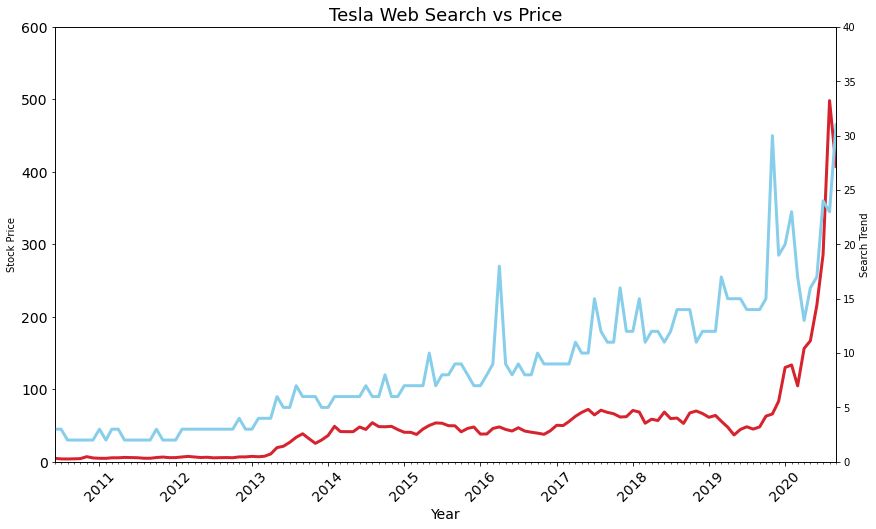

In [25]:
plt.figure(figsize=(14,8))

plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14, rotation = 45)

plt.xlabel("Year", fontsize = 14)
plt.title("Tesla Web Search vs Price", fontsize = 18)

# Gives minor ticks using locator and formatter
stock_price = plt.gca()
search_trend = stock_price.twinx()

stock_price.set_ylabel("Stock Price")
search_trend.set_ylabel("Search Trend")


stock_price.set_ylim([0, 600])
stock_price.set_xlim([tesla_data["MONTH"].min(), tesla_data["MONTH"].max()])
search_trend.set_ylim([0,40])

stock_price.xaxis.set_major_locator(years)
stock_price.xaxis.set_major_formatter(years_formatter)
stock_price.xaxis.set_minor_locator(months)

stock_price.plot(tesla_data["MONTH"], tesla_data["TSLA_USD_CLOSE"], linewidth = '3',label="Stock Price", color = '#D6232E')
search_trend.plot(tesla_data["MONTH"], tesla_data["TSLA_WEB_SEARCH"] ,linewidth = '3',label= "Search Trend", color = 'skyblue')

plt.show()

### Bitcoin Visualization with Line Style and Markers

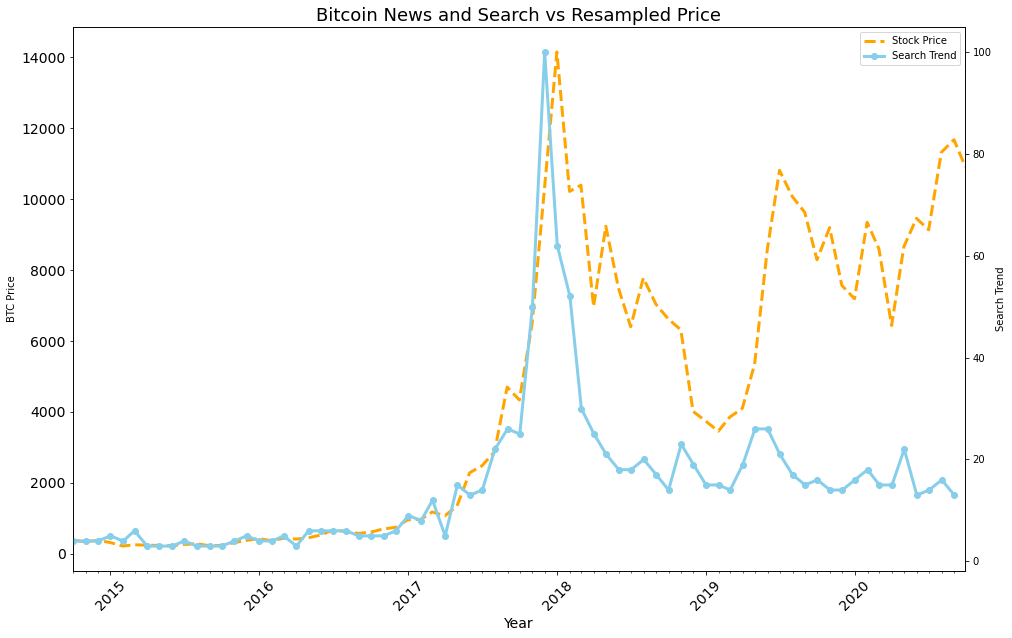

In [47]:
plt.figure(figsize=(16,10))

plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14, rotation = 45)

plt.xlabel("Year", fontsize = 14)
plt.title("Bitcoin News and Search vs Resampled Price", fontsize = 18)

# Gives minor ticks using locator and formatter
btc_price = plt.gca()
search_trend = btc_price.twinx()

btc_price.set_ylabel("BTC Price")
search_trend.set_ylabel("Search Trend")



btc_price.set_xlim([bitcoin_price_data["DATE"].min(), bitcoin_price_data["DATE"].max()])


btc_price.xaxis.set_major_locator(years)
btc_price.xaxis.set_major_formatter(years_formatter)
btc_price.xaxis.set_minor_locator(months)

line1 = btc_price.plot(bitcoin_price_data['DATE'], bitcoin_price_data["CLOSE"],linestyle = 'dashed', linewidth='3', label="Stock Price", color = 'orange')
line2 = search_trend.plot(bitcoin_search_data['MONTH'], bitcoin_search_data["BTC_NEWS_SEARCH"], marker = 'o', linewidth = '3',label= "Search Trend", color = 'skyblue')

lines = btc_price.get_lines() + search_trend.get_lines()
plt.legend(lines, [l.get_label() for l in lines], loc='upper right')


plt.show()

### Using Grid in Matplotlib

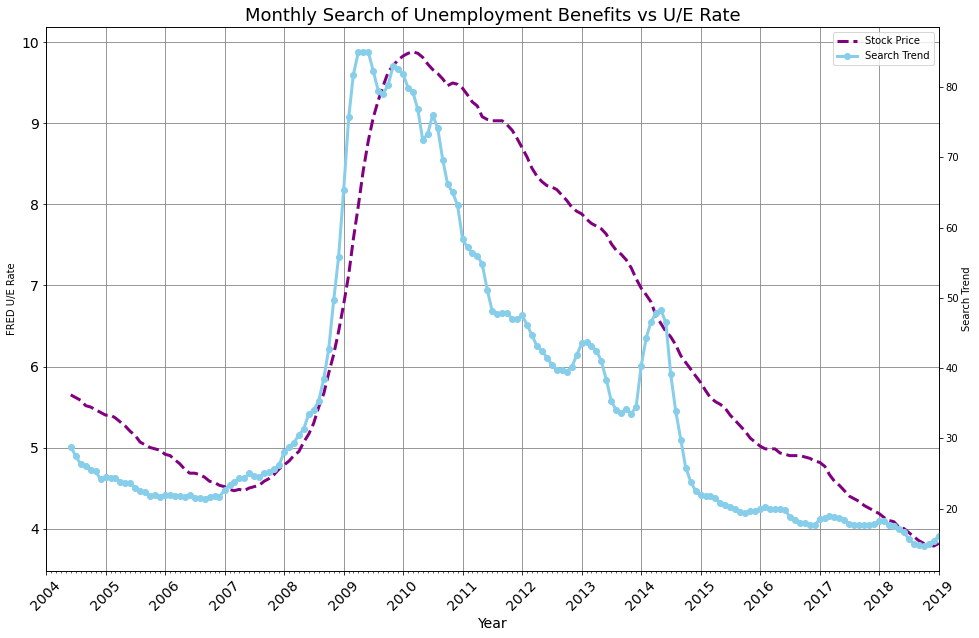

In [53]:
plt.figure(figsize=(16,10))

plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14, rotation = 45)

plt.xlabel("Year", fontsize = 14)
plt.title("Monthly Search of Unemployment Benefits vs U/E Rate", fontsize = 18)

# Gives minor ticks using locator and formatter
unemployment_data1 = plt.gca()
unemployment_data2 = unemployment_data1.twinx()

unemployment_data1.set_ylabel("FRED U/E Rate")
unemployment_data2.set_ylabel("Search Trend")



unemployment_data1.set_xlim([unemployment_data_19["MONTH"].min(), unemployment_data_19["MONTH"].max()])


unemployment_data1.xaxis.set_major_locator(years)
unemployment_data1.xaxis.set_major_formatter(years_formatter)
unemployment_data1.xaxis.set_minor_locator(months)

unemployment_data1.grid(color='grey', linestyle='-')

rolling_average_df = unemployment_data_19[['UE_BENEFITS_WEB_SEARCH','UNRATE']].rolling(window=6).mean()

line1 = unemployment_data1.plot(unemployment_data_19['MONTH'], rolling_average_df["UNRATE"],linestyle = 'dashed', linewidth='3', label="Stock Price", color = 'purple')
line2 = unemployment_data2.plot(unemployment_data_19['MONTH'], rolling_average_df["UE_BENEFITS_WEB_SEARCH"], marker = 'o', linewidth = '3',label= "Search Trend", color = 'skyblue')

lines = unemployment_data1.get_lines() + unemployment_data2.get_lines()
plt.legend(lines, [l.get_label() for l in lines], loc='upper right')


plt.show()

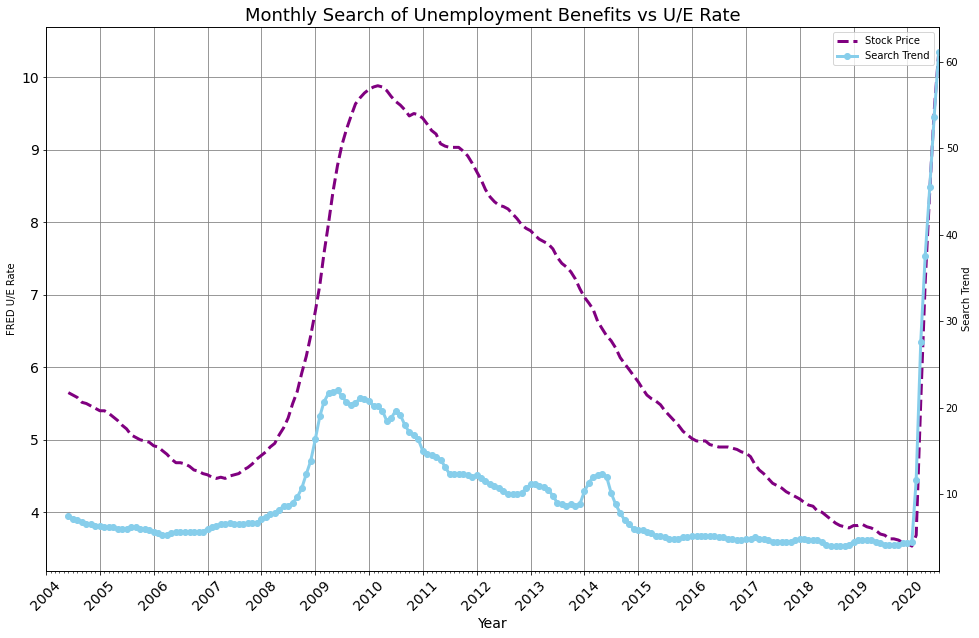

In [54]:
plt.figure(figsize=(16,10))

plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14, rotation = 45)

plt.xlabel("Year", fontsize = 14)
plt.title("Monthly Search of Unemployment Benefits vs U/E Rate", fontsize = 18)

# Gives minor ticks using locator and formatter
unemployment_data1 = plt.gca()
unemployment_data2 = unemployment_data1.twinx()

unemployment_data1.set_ylabel("FRED U/E Rate")
unemployment_data2.set_ylabel("Search Trend")



unemployment_data1.set_xlim([unemployment_data_20["MONTH"].min(), unemployment_data_20["MONTH"].max()])


unemployment_data1.xaxis.set_major_locator(years)
unemployment_data1.xaxis.set_major_formatter(years_formatter)
unemployment_data1.xaxis.set_minor_locator(months)

unemployment_data1.grid(color='grey', linestyle='-')

rolling_average_df = unemployment_data_20[['UE_BENEFITS_WEB_SEARCH','UNRATE']].rolling(window=6).mean()

line1 = unemployment_data1.plot(unemployment_data_20['MONTH'], rolling_average_df["UNRATE"],linestyle = 'dashed', linewidth='3', label="Stock Price", color = 'purple')
line2 = unemployment_data2.plot(unemployment_data_20['MONTH'], rolling_average_df["UE_BENEFITS_WEB_SEARCH"], marker = 'o', linewidth = '3',label= "Search Trend", color = 'skyblue')

lines = unemployment_data1.get_lines() + unemployment_data2.get_lines()
plt.legend(lines, [l.get_label() for l in lines], loc='upper right')


plt.show()